In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
scaled_data = StandardScaler().fit(df).transform(df)

pca = PCA(n_components = 2,whiten=True).fit(scaled_data)
# PCA(copy=True, n_components=2, whiten=False)

x_pca = pca.transform(scaled_data)
print(df.shape, x_pca.shape)

(569, 30) (569, 2)


In [10]:
print(type(x_pca))

<class 'numpy.ndarray'>


In [13]:
x_pca = pd.DataFrame(x_pca)

- Plotting the PCA-transformed version of the breast cancer dataset. We can see that malignant and benign cells cluster between two groups and can apply a linear classifier to this two dimensional representation of the dataset.

Text(0,0.5,'Second Principal Component')

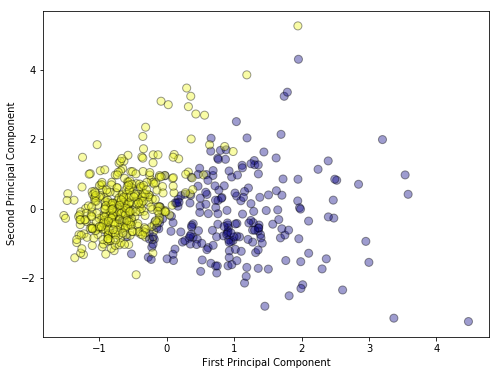

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

- Plotting the magnitude of each feature value for the first two principal components. This gives the best explanation for the components for each field.

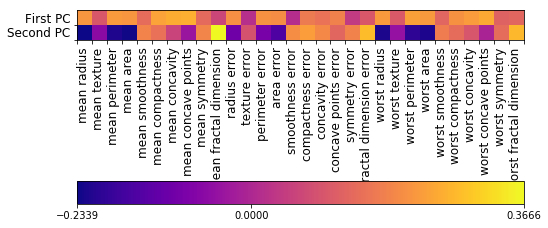

In [20]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()], pad=0.65);

- We can also plot the feature magnitudes in the scatterplot like in R into two separate axes,**also known as a "Biplot"**. This shows the relationship of each feature’s magnitude clearer in a 2D space.



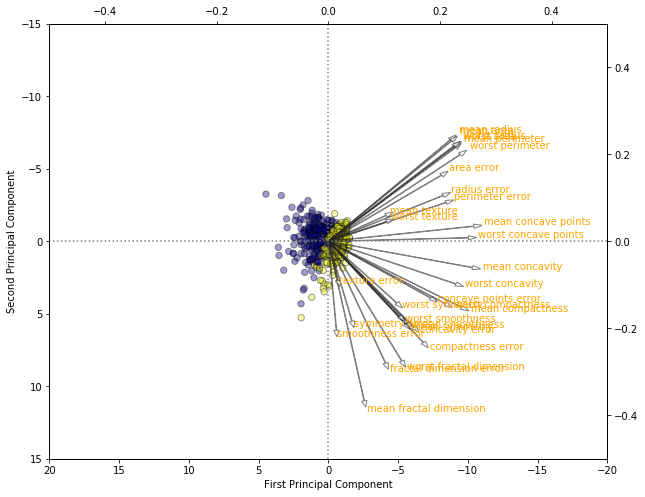

In [21]:
# put feature values into dataframe
components = pd.DataFrame(pca.components_.T, index=df.columns, columns=['PCA1','PCA2'])

# plot size
plt.figure(figsize=(10,8))

# main scatterplot
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma', alpha=0.4, edgecolors='black', s=40);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.ylim(15,-15);
plt.xlim(20,-20);

# individual feature values
ax2 = plt.twinx().twiny();
ax2.set_ylim(-0.5,0.5);
ax2.set_xlim(-0.5,0.5);

# reference lines
ax2.hlines(0,-0.5,0.5, linestyles='dotted', colors='grey')
ax2.vlines(0,-0.5,0.5, linestyles='dotted', colors='grey')

# offset for labels
offset = 1.07

# arrow & text
for a, i in enumerate(components.index):
    ax2.arrow(0, 0, components['PCA1'][a], -components['PCA2'][a], \
            alpha=0.5, facecolor='white', head_width=.01)
    ax2.annotate(i, (components['PCA1'][a]*offset, -components['PCA2'][a]*offset), color='orange')